In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay
)

from sklearn.datasets import load_iris
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Zadanie 2
Klasyfikacja binarna na podstawie danych Breast Cancer:
• Zadanie polega na zbudowaniu prostego modelu głębokiej sieci neuronowej w Keras do
klasyfikacji białaczkowych komórek nowotworowych na podstawie danych z Breast Cancer Dataset
• Wykorzystaj bazę danych Breast Cancer, która zawiera informacje diagnostyczne dotyczące raka piersi.
• Zdefiniuj prostą architekturę modelu, skompiluj go i przeprowadź proces trenowania.
• Wykorzystaj metody oceny na zbiorze testowym, takie jak dokładność, precyzja, czułość,
specyficzność, oraz zwizualizuj wyniki za pomocą macierzy pomyłek.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7359 - loss: 0.5628 - val_accuracy: 0.9275 - val_loss: 0.2757
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9452 - loss: 0.2229 - val_accuracy: 0.9420 - val_loss: 0.1498
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9432 - loss: 0.1530 - val_accuracy: 0.9565 - val_loss: 0.1186
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9693 - loss: 0.1015 - val_accuracy: 0.9565 - val_loss: 0.1039
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9787 - loss: 0.0946 - val_accuracy: 0.9710 - val_loss: 0.0910
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9896 - loss: 0.0561 - val_accuracy: 0.9710 - val_loss: 0.0831
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9816 - loss: 0.0639 - val_accuracy: 0.9710 - val_loss: 0.0773
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9826 - loss: 0.0525 - val_accuracy: 0.9710 - val_l

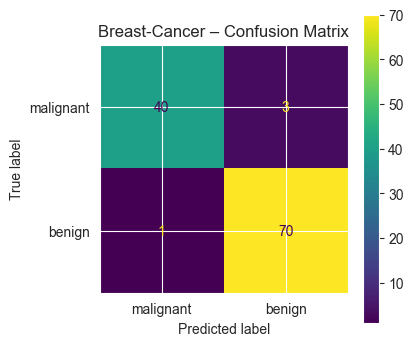

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
y = data.target
X = data.data


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# definicja modelu
model = keras.Sequential([
    layers.Input(shape = (X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') # bo output będzie binarny
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
model.summary()


history = model.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=50,
    batch_size=32,
    verbose=1,
)

y_pred_prob = model.predict(X_test).flatten()
y_pred      = (y_pred_prob >= 0.5).astype(int)

acc  = accuracy_score (y_test, y_pred)
prec = precision_score(y_test, y_pred)
sens = recall_score   (y_test, y_pred) # sensivity
cm   = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
spec = tn / (tn + fp)

print(f"Accuracy      : {acc:.4f}")
print(f"Precision     : {prec:.4f}")
print(f"Sensitivity   : {sens:.4f}")
print(f"Specificity   : {spec:.4f}")


# Wizualizacja macierzy pomyłek
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=data.target_names)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, values_format='d')
plt.title("Breast-Cancer – Confusion Matrix")
plt.show()

### Widzimy, że model spisuje się bardzo dobrze. Najczęstsze pomyłki to predykowanie etykiety benign, zamiast maligant

# Zadanie 3
Zadanie polega na stworzeniu modelu głębokiej sieci neuronowej w Keras do klasyfikacji
gatunków irysów na podstawie danych z Iris Dataset.
• Użyj bazy danych Iris, która zawiera informacje o długości i szerokości płatków irysów.
• Zdefiniuj bardziej złożoną architekturę modelu, skompiluj go i przeprowadź proces trenowania.
• Wykorzystaj metody oceny na zbiorze testowym oraz zwizualizuj krzywe uczenia.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,075 (43.26 KB)

 Trainable params: 11,075 (43.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.5000 - loss: 1.0324 - val_accuracy: 0.7083 - val_loss: 0.9756
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6484 - loss: 0.9493 - val_accuracy: 0.7083 - val_loss: 0.9177
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6120 - loss: 0.8827 - val_accuracy: 0.7083 - val_loss: 0.8618
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6823 - loss: 0.8154 - val_accuracy: 0.7083 - val_loss: 0.8067
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6497 - loss: 0.7660 - val_accuracy: 0.7500 - val_loss: 0.7554
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6862 - loss: 0.7352 - val_accuracy: 0.7917 - val_loss: 0.7042
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7018 - loss: 0.6508 - val_accuracy: 0.7917 - val_loss: 0.6558
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7357 - loss: 0.5870 - val_accuracy: 0.7917 - val_loss

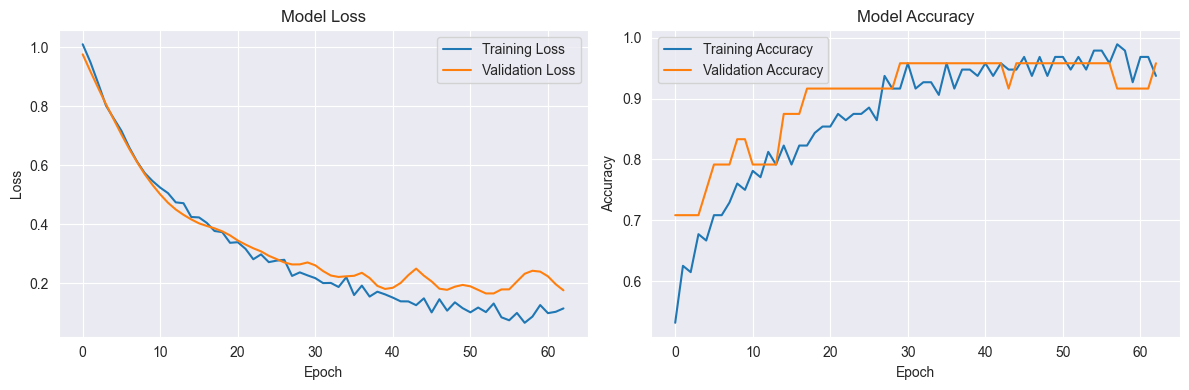

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


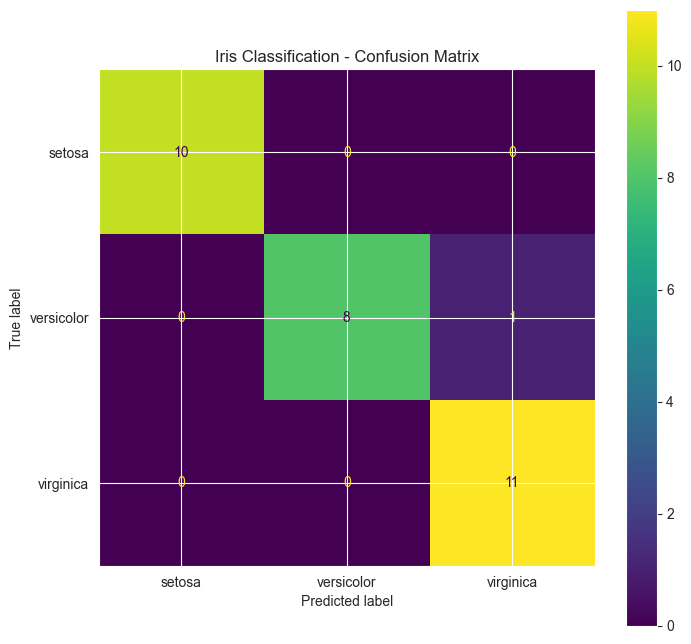

Accuracy: 0.9667


In [5]:

iris = load_iris()
X = iris.data
y = iris.target

# Podział danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Model wieloklasowej sieci neuronowej
model = keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Trenowanie modelu
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
)


# Wizualizacja procesu uczenia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()


# Ewaluacja modelu
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax)
plt.title("Iris Classification - Confusion Matrix")
plt.show()

print(f"Accuracy: {accuracy_score(y_test, y_pred_classes):.4f}")


### Znowu widzimy że nasz model spisuje się bardzo dobrze - Accuracy na poziomie .96 to świetny wynik!
### Można zauważyć że model już w około 30 epoce osiąga bardzo wysoki wskaźnik accuracy.
### Wraz ze wzrostem epok model coraz bardziej zmiejsza swój błąd na danych treningowych, lecz może to prowadzić do przeuczenia modelu - widzimy na wykresie że w epoce 40 validation loss jest niski, dalsze trenowanie modelu nie poprawia jego loss, może to wręcz doprowadzić do wzrostu loss function dla danych walidacyjnych.

# Zadanie 4
Zadanie polega na wykorzystaniu istniejącego modelu głębokiej sieci neuronowej, np.
VGG16, w celu klasyfikacji twarzy na podstawie danych z bazy danych VGGFace.
• Użyj bazy danych VGGFace, która zawiera miliony zdjęć twarzy różnych osób.
• Wczytaj pre-trenowany model z Keras, a następnie dostosuj go do nowego zadania klasyfikacji za pomocą techniki transferu w uczeniu z nadzorem  Ocenić wydajność modelu.

In [10]:
# 1. Importy potrzebnych bibliotek
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% na walidację i skalowanie pixeli do zakresu 0 - 1.

train_gen = datagen.flow_from_directory(
    r'C:\Users\Kacpe\Desktop\Vgg\dataset',
    target_size=(224, 224), # format potrzebny aby użyć VGG16
    batch_size=32, # wrzucam po 32 zdjęcia
    class_mode='categorical', # chcę mieć dane kategorialne
    subset='training',
    shuffle=True # mieszam kolejność
)

val_gen = datagen.flow_from_directory(
    r'C:\Users\Kacpe\Desktop\Vgg\dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)



Found 158369 images belonging to 540 classes.
Found 39324 images belonging to 540 classes.


In [6]:
# model VGG16 z wagami z imagenet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Warstwy VGG16 – nie będą się uczyć
for layer in base_model.layers:
    layer.trainable = False


In [7]:
# dodaję nowe warstwy końcowe
x = base_model.output
x = Flatten()(x) #spłaszczam dane do wektora 1d
x = Dense(256, activation='relu')(x) # dodaję warstwę z 256 neuronami
x = Dropout(0.5)(x) #  podczas treningu chcę aby model zapamiętał więcej zworców więc zapomina o połowie danych
predictions = Dense(train_gen.num_classes, activation='softmax')(x) #używam softmax aby dostać procentowy wynik

# finalny model
model = Model(inputs=base_model.input, outputs=predictions)


In [8]:
#  Kompilacja modelu
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 540)            │       138,780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,276,252 (81.16 MB)

 Trainable params: 6,561,564 (25.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    steps_per_epoch=50,  # np. 50 batchy zamiast pełnego zbioru
    validation_steps=10   # również mniejsza liczba kroków na walidacji
)



Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 359s 7s/step - accuracy: 0.0026 - loss: 6.3057 - val_accuracy: 0.0000e+00 - val_loss: 6.3019
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 196s 4s/step - accuracy: 0.0028 - loss: 6.2879 - val_accuracy: 0.0000e+00 - val_loss: 6.2804
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 332s 7s/step - accuracy: 0.0019 - loss: 6.2868 - val_accuracy: 0.0000e+00 - val_loss: 6.2783
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 363s 7s/step - accuracy: 0.0033 - loss: 6.2922 - val_accuracy: 0.0000e+00 - val_loss: 6.3081
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 244s 5s/step - accuracy: 1.9534e-04 - loss: 6.2873 - val_accuracy: 0.0000e+00 - val_loss: 6.2760
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 241s 5s/step - accuracy: 8.6488e-04 - loss: 6.2841 - val_accuracy: 0.0000e+00 - val_loss: 6.2894
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 244s 5s/step - accuracy: 0.0014 - loss: 6.2891 - val_accuracy: 0.0031 - val_loss: 6.2974
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 247s 5s/step - accuracy: 0.0043 - loss: 6

In [11]:
# Ewaluacja modelu
loss, acc = model.evaluate(val_gen)
print(f"Dokładność na zbiorze walidacyjnym: {acc:.2f}")


1229/1229 ━━━━━━━━━━━━━━━━━━━━ 5508s 4s/step - accuracy: 0.0048 - loss: 6.2784
Dokładność na zbiorze walidacyjnym: 0.00


### Dokładność na zbiorze walidacyjnym wynosi 0, jest to spowodowane tym że podczas uczenia modelu dałem za mało danych - mój laptop nie był w stanie w szybkim czasie przerobić większej ilosci więc zrobię to zadanie jeszcze raz ale wezmę zdjęcia tylko 10 pierwszych osób

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% na walidację i skalowanie pixeli do zakresu 0 - 1.

train_gen = datagen.flow_from_directory(
    r'C:\Users\Kacpe\Desktop\VggMini\dataset',
    target_size=(224, 224), # format potrzebny aby użyć VGG16
    batch_size=32, # wrzucam po 32 zdjęcia
    class_mode='categorical', # chcę mieć dane kategorialne
    subset='training',
    shuffle=True # mieszam kolejność
)

val_gen = datagen.flow_from_directory(
    r'C:\Users\Kacpe\Desktop\VggMini\dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 2299 images belonging to 10 classes.
Found 570 images belonging to 10 classes.


In [19]:
# model VGG16 z wagami z imagenet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Warstwy VGG16 – nie będą się uczyć
for layer in base_model.layers:
    layer.trainable = False


In [20]:
# nowe warstwy końcowe
x = base_model.output
x = Flatten()(x) #spłaszczam dane do wektora 1d
x = Dense(256, activation='relu')(x) # dodaję warstwę z 256 neuronami
x = Dropout(0.5)(x) #  podczas treningu chcę aby model zapamiętał więcej zworców więc zapomina o połowie danych
predictions = Dense(train_gen.num_classes, activation='softmax')(x) #używam softmax aby dostać procentowy wynik

# 6. Tworzysz finalny model
model = Model(inputs=base_model.input, outputs=predictions)

In [21]:
# Kompilacja modelu
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [22]:
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=10,
        steps_per_epoch=50,      # np. 50 batchy zamiast pełnego zbioru
        validation_steps=10
    )

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 379s 8s/step - accuracy: 0.2819 - loss: 2.2005 - val_accuracy: 0.8344 - val_loss: 0.8437
Epoch 2/10
22/50 ━━━━━━━━━━━━━━━━━━━━ 4:58 11s/step - accuracy: 0.6263 - loss: 1.2215

C:\pycharm\zarzycki mnbd\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 286s 6s/step - accuracy: 0.6313 - loss: 1.1911 - val_accuracy: 0.7844 - val_loss: 0.7361
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 341s 7s/step - accuracy: 0.6887 - loss: 0.9856 - val_accuracy: 0.8687 - val_loss: 0.5492
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 287s 6s/step - accuracy: 0.7752 - loss: 0.7386 - val_accuracy: 0.8906 - val_loss: 0.5082
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 240s 5s/step - accuracy: 0.8170 - loss: 0.6637 - val_accuracy: 0.9062 - val_loss: 0.3805
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step - accuracy: 0.8402 - loss: 0.5462 - val_accuracy: 0.9219 - val_loss: 0.3216
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 295s 6s/step - accuracy: 0.8739 - loss: 0.4634 - val_accuracy: 0.9344 - val_loss: 0.3469
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.8819 - loss: 0.4509 - val_accuracy: 0.9031 - val_loss: 0.3669
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 258s 5s/step - accuracy: 0.9134 - loss: 0.3706 - val_accuracy: 0.9344 - val_loss: 0.

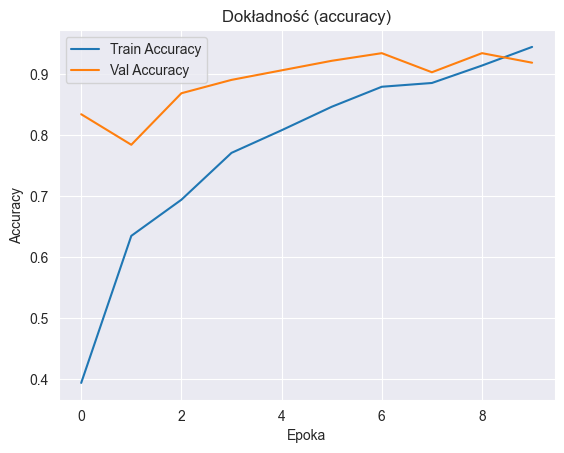

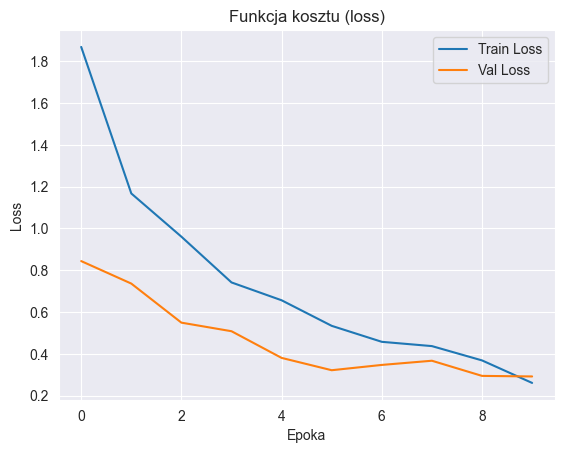

In [23]:
import matplotlib.pyplot as plt

# Dokładność
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Dokładność (accuracy)')
plt.xlabel('Epoka')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Funkcja straty
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Funkcja kosztu (loss)')
plt.xlabel('Epoka')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final train accuracy: {final_train_acc:.4f}")
print(f"Final val accuracy: {final_val_acc:.4f}")
print(f"Final train loss: {final_train_loss:.4f}")
print(f"Final val loss: {final_val_loss:.4f}")


Final train accuracy: 0.9446
Final val accuracy: 0.9187
Final train loss: 0.2608
Final val loss: 0.2918


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


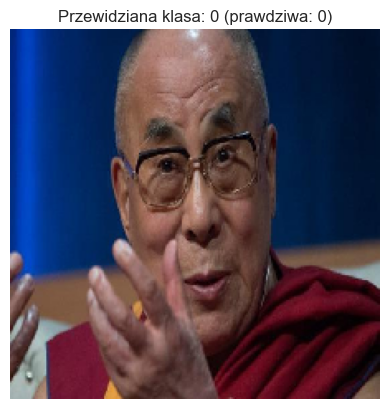

In [32]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Pobierz batch z walidacji
val_images, val_labels = next(val_gen)

# Wybierz pierwszy obraz
img = val_images[0]
true_label = np.argmax(val_labels[0])

# Przewidywanie
pred = model.predict(np.expand_dims(img, axis=0))
pred_label = np.argmax(pred[0])


plt.imshow(img)
plt.title(f"Przewidziana klasa: {pred_label} (prawdziwa: {true_label})")
plt.axis('off')
plt.show()


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [31]:
# generator nie losuje za każdym razem innych danych
val_gen.reset()

num_batches = 20

y_true = []
y_pred = []

for _ in range(num_batches):
    x_batch, y_batch = next(val_gen)
    preds = model.predict(x_batch)

    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


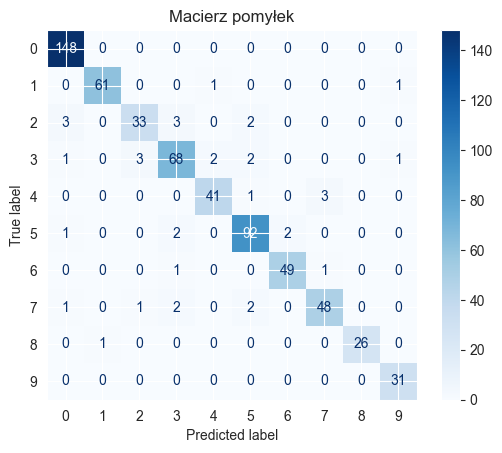

In [34]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.title("Macierz pomyłek")
plt.show()


### Widzę że mój model radzi sobie bardzo dobrze, lecz czasami myli np klasę 7 z 3

### Wyświetlę teraz parę przykładów gdzie model błędnie klasyfikuje osobę 7 jako 4

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Zbierz dane z całego zbioru walidacyjnego
val_images = []
val_labels = []

val_gen.reset()

for i in range(len(val_gen)):
    imgs, labels = val_gen[i]
    val_images.extend(imgs)
    val_labels.extend(np.argmax(labels, axis=1))  # one-hot → indeksy klas

val_images = np.array(val_images)
val_labels = np.array(val_labels)


In [38]:
# Predykcje modelu
pred_probs = model.predict(val_images)
pred_labels = np.argmax(pred_probs, axis=1)

# Znajdź indeksy, gdzie prawdziwa etykieta to 4, a model przewidział 7
mylone_indeksy = np.where((val_labels == 4) & (pred_labels == 7))[0]


18/18 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step


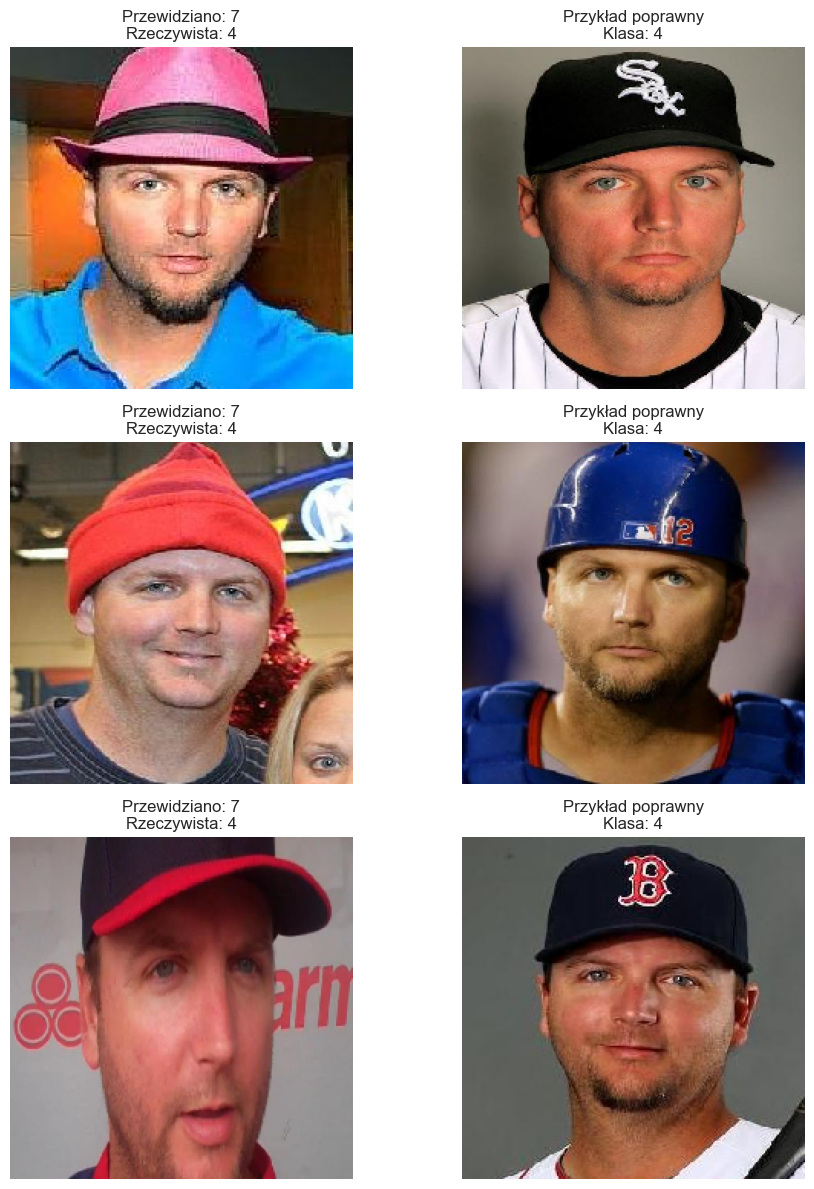

In [47]:
import matplotlib.pyplot as plt

klasa_4_indeksy = np.where(val_labels == 4)[0]


n = min(5, len(mylone_indeksy), len(klasa_4_indeksy))

plt.figure(figsize=(10, 4 * n))

for i in range(n):
    idx_pred = mylone_indeksy[i]
    idx_gt = klasa_4_indeksy[i]


    plt.subplot(n, 2, 2 * i + 1)
    plt.imshow(val_images[idx_pred])
    plt.title("Przewidziano: 7\nRzeczywista: 4")
    plt.axis('off')

    plt.subplot(n, 2, 2 * i + 2)
    plt.imshow(val_images[idx_gt])
    plt.title("Przykład poprawny\nKlasa: 4")
    plt.axis('off')

plt.tight_layout()
plt.show()


Widzimy że twarze 2 panów sa całkiem podobne. istnieje również szansa że osoba po prawej ma dużo zdjęć z czapkami więc gdy model widzi osobę z czapką klasyfikuje ją jako klasa 4

# Jestem również świadomy że nie podzieliłem danch jeszcze na zbiór treningowy - zrobię zadanie jeszcze raz i zobaczę jakie są wyniki na zbiorze treningowym

In [5]:
import os
import shutil
import random

# Ścieżki źródłowe i docelowe
dataset_dir = r'C:\Users\Kacpe\Desktop\VggMini\dataset'
test_dir = r'C:\Users\Kacpe\Desktop\VggMini\test'

# Procent danych do przeniesienia do testu
test_split = 0.2

# Przejdź przez każdą klasę
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Utwórz folder docelowy jeśli nie istnieje
    dest_class_path = os.path.join(test_dir, class_name)
    os.makedirs(dest_class_path, exist_ok=True)

    # Lista wszystkich obrazów w klasie
    images = os.listdir(class_path)
    images = [img for img in images if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Ile obrazów przenieść
    num_to_move = int(len(images) * test_split)

    # Wybierz losowe obrazy
    test_images = random.sample(images, num_to_move)

    # Przenieś je
    for img in test_images:
        src_path = os.path.join(class_path, img)
        dst_path = os.path.join(dest_class_path, img)
        shutil.move(src_path, dst_path)

    print(f"[{class_name}] Przeniesiono {num_to_move} zdjęć do test/")


[n000001] Przeniesiono 84 zdjęć do test/
[n000002] Przeniesiono 63 zdjęć do test/
[n000003] Przeniesiono 41 zdjęć do test/
[n000004] Przeniesiono 77 zdjęć do test/
[n000005] Przeniesiono 45 zdjęć do test/
[n000006] Przeniesiono 97 zdjęć do test/
[n000007] Przeniesiono 51 zdjęć do test/
[n000008] Przeniesiono 54 zdjęć do test/
[n000009] Przeniesiono 27 zdjęć do test/
[n000010] Przeniesiono 31 zdjęć do test/


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% na walidację i skalowanie pixeli do zakresu 0 - 1.

train_gen = datagen.flow_from_directory(
    r'C:\Users\Kacpe\Desktop\VggMini\dataset',
    target_size=(224, 224), # format potrzebny aby użyć VGG16
    batch_size=32, # wrzucam po 32 zdjęcia
    class_mode='categorical', # chcę mieć dane kategorialne
    subset='training',
    shuffle=True # mieszam kolejność
)

val_gen = datagen.flow_from_directory(
    r'C:\Users\Kacpe\Desktop\VggMini\dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    r'C:\Users\Kacpe\Desktop\VggMini\test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1844 images belonging to 10 classes.
Found 455 images belonging to 10 classes.
Found 570 images belonging to 10 classes.


In [11]:
# model VGG16 z wagami z imagenet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Warstwy VGG16 – nie będą się uczyć
for layer in base_model.layers:
    layer.trainable = False

In [12]:
# Dodaję warstwy końcowe
x = base_model.output
x = Flatten()(x) #spłaszczam dane do wektora 1d
x = Dense(256, activation='relu')(x) # dodaję warstwę z 256 neuronami
x = Dropout(0.5)(x) #  podczas treningu chcę aby model zapamiętał więcej zworców więc zapomina o połowie danych
predictions = Dense(train_gen.num_classes, activation='softmax')(x) #używam softmax aby dostać procentowy wynik

# 6. Tworzysz finalny model
model = Model(inputs=base_model.input, outputs=predictions)


In [13]:
# Kompilacja modelu
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
)


Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 285s 5s/step - accuracy: 0.2704 - loss: 2.1279 - val_accuracy: 0.7758 - val_loss: 0.9613
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 237s 4s/step - accuracy: 0.6794 - loss: 1.0994 - val_accuracy: 0.8703 - val_loss: 0.5578
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 268s 5s/step - accuracy: 0.8031 - loss: 0.7110 - val_accuracy: 0.8857 - val_loss: 0.4460
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 272s 5s/step - accuracy: 0.8586 - loss: 0.4985 - val_accuracy: 0.9187 - val_loss: 0.3605
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 277s 5s/step - accuracy: 0.9137 - loss: 0.3671 - val_accuracy: 0.9011 - val_loss: 0.3296
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 272s 5s/step - accuracy: 0.9177 - loss: 0.3243 - val_accuracy: 0.9055 - val_loss: 0.2936
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 271s 5s/step - accuracy: 0.9489 - loss: 0.2434 - val_accuracy: 0.9253 - val_loss: 0.2810
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 273s 5s/step - accuracy: 0.9629 - loss: 0.1983 - val_accuracy: 0.9297 - v

In [15]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.9048 - loss: 0.3217

Test accuracy: 0.8860
Test loss: 0.3851


### Jak można zauważyć - accuracy na treningowych danych nynosi 0.98, na walidacyjnych 0.93 a na testowych 0.88. Moim zdaniem mam doczyniania z przeuczeniem się modelu. Jeśli chciałbym w przyszłości ulepszyć jego predykcje to powinienem dodać np. regularyzację, albo early stopping na podstawie metryk walidacyjnych